### Near Earch Comet Project
##### 1. min orbital intersection distance to earth
##### 2. min orbital period
##### 3. avg eccentricity
##### 4. mean orbit to sun 
##### 5. max inclination

In [4]:
import pandas as pd
import numpy as np
import unicodecsv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def convert_int(integer):
    if integer == '':
        return None
    else:
        return int(integer)

def convert_flt(flt):
    if flt == '' or flt == None:
        return None
    else:
        return float(flt)

nec = []
with open('Near-Earth_Comets_-_Orbital_Elements.csv', 'rb') as c:
    reader = unicodecsv.DictReader(c)
    nec = list(reader)

nec[3]

OrderedDict([('Object', '5D/Brorsen'),
             ('Epoch (TDB)', '7440'),
             ('TP (TDB)', '2407439.534'),
             ('e', '0.809796'),
             ('i (deg)', '29.3821'),
             ('w (deg)', '14.9468'),
             ('Node (deg)', '102.9676'),
             ('q (AU)', '0.589847'),
             ('Q (AU)', '5.61'),
             ('P (yr)', '5.46'),
             ('MOID (AU)', '0.366559'),
             ('A1 (AU/d^2)', '0.0000000127'),
             ('A2 (AU/d^2)', '0.00000000134'),
             ('A3 (AU/d^2)', ''),
             ('DT (d)', ''),
             ('ref', 'IAUCAT03'),
             ('Object_name', '5D/Brorsen')])

In [18]:
for e in nec:
    e['Epoch (TDB)'] = int(float(e['Epoch (TDB)']))
    e['TP (TDB)'] = float(e['TP (TDB)'])
    e['e'] = convert_flt(e['e'])
    e['i (deg)'] = float(e['i (deg)'])
    e['w (deg)'] = float(e['w (deg)'])
    e['Node (deg)'] = float(e['Node (deg)'])
    e['q (AU)'] = float(e['q (AU)'])
    e['Q (AU)'] = float(e['Q (AU)'])
    e['P (yr)'] = float(e['P (yr)'])
    e['MOID (AU)'] = float(e['MOID (AU)'])
    e['A1 (AU/d^2)'] = convert_flt(e['A1 (AU/d^2)'])
    e['A2 (AU/d^2)'] = convert_flt(e['A2 (AU/d^2)'])
    e['A3 (AU/d^2)'] = convert_flt(e['A3 (AU/d^2)'])
    e['DT (d)'] = convert_flt(e['DT (d)'])
    
nec[3]

OrderedDict([('Object', '5D/Brorsen'),
             ('Epoch (TDB)', 7440),
             ('TP (TDB)', 2407439.534),
             ('e', 0.809796),
             ('i (deg)', 29.3821),
             ('w (deg)', 14.9468),
             ('Node (deg)', 102.9676),
             ('q (AU)', 0.589847),
             ('Q (AU)', 5.61),
             ('P (yr)', 5.46),
             ('MOID (AU)', 0.366559),
             ('A1 (AU/d^2)', 1.27e-08),
             ('A2 (AU/d^2)', 1.34e-09),
             ('A3 (AU/d^2)', None),
             ('DT (d)', None),
             ('ref', 'IAUCAT03'),
             ('Object_name', '5D/Brorsen')])

In [19]:
# number of near earth comets
def num_objects(sample):
    sample = np.array(sample)
    return sample.size

num_objects(nec)

# min orbital intersection distance to earth
def min_moid(sample, column): 
    l_1 = []

    for i in sample:
        o = i[column]
        l_1.append(o)
    
    distance = min(l_1)

    return distance

min_moid(nec,'MOID (AU)')

# orbit period
def min_P(sample, column): 
    l_1 = []
    for i in sample:
        o = i[column]
        l_1.append(o)
    time = min(l_1)
    return time

min_P(nec,'P (yr)')

def calc_sum_objects(sample):
    total = 0
    for i in sample:
        num = i['e']
        total += num
    return round(total,2)
calc_sum_objects(nec)

def calc_sum_objects_q(sample):
    total = 0
    for i in sample:
        num = i['q (AU)']
        total += num
    return round(total,2)
calc_sum_objects_q(nec)

def calc_sum_objects_Q(sample):
    total = 0
    for i in sample:
        num = i['Q (AU)']
        total += num
    return round(total,2)
calc_sum_objects_Q(nec)

# peri avg / aph avg
def peri_avg(sample):
    total = calc_sum_objects_q(nec)
    size = num_objects(nec)
    average = total / size
    return round(average,2)

print(peri_avg(nec[8]))

def aph_avg(sample):
    total = calc_sum_objects_Q(nec)
    size = num_objects(nec)
    average = total / size
    return round(average,2)

print(aph_avg(nec[9])) 

# mean distance from sun
def peri_aph_mean(sample):
    total = calc_sum_objects_q(nec) + calc_sum_objects_Q(nec)
    size = num_objects(nec)
    average = total / (size * 2)
    return round(average,2)

print(peri_aph_mean(nec))  


# avg eccentricity
def avg_1(sample):
    total = calc_sum_objects(nec)
    size = num_objects(nec)
    average = total / size
    return round(average,2)

avg_1(nec[4])

0.92
9.49
5.2


0.75

In [6]:
c = pd.read_csv('Near-Earth_Comets_-_Orbital_Elements.csv')
c.describe()

,Epoch (TDB),TP (TDB),e,i (deg),w (deg),Node (deg),q (AU),Q (AU),P (yr),MOID (AU),A1 (AU/d^2),A2 (AU/d^2),A3 (AU/d^2),DT (d)
count,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,3.800000e+01,4.100000e+01,1.000000e+01,4.00000
mean,52547.825000,2.452495e+06,0.748886,24.561972,176.693851,127.052444,0.917272,9.486625,15.525125,0.119765,4.631589e-08,9.713200e-11,2.770700e-10,20.56750
std,8225.459908,8.241278e+03,0.110730,33.988129,87.793130,97.461286,0.277686,10.817059,29.039862,0.119806,2.105691e-07,1.894444e-09,9.240339e-10,74.62686
min,-9480.000000,2.390514e+06,0.586980,3.145619,0.626838,1.415670,0.028321,4.090000,3.300000,0.000518,-3.650000e-08,-5.480000e-09,-9.570000e-10,-32.80000
25%,53819.500000,2.453893e+06,0.685054,11.313526,148.616866,69.831755,0.937098,5.110000,5.277500,0.040486,7.665000e-11,-2.710000e-10,-3.825000e-10,-17.35000
50%,53839.000000,2.453895e+06,0.694792,11.421423,198.736029,70.077436,0.939366,5.240000,5.420000,0.045015,1.340000e-09,-9.380000e-13,1.338500e-10,-7.96500
75%,55173.500000,2.455078e+06,0.815589,19.111926,199.010217,207.739213,1.054545,6.237500,6.725000,0.175737,7.215000e-09,1.720000e-10,6.485000e-10,29.95250
max,57124.000000,2.457876e+06,0.994268,172.513745,358.551572,359.396114,1.297735,64.270000,185.640000,0.515916,1.250000e-06,5.860000e-09,2.080000e-09,131.00000


#### Linear Regression

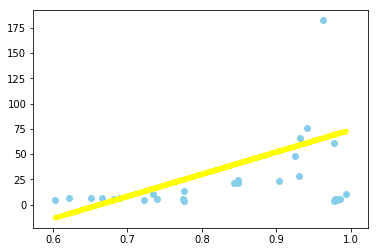

In [7]:
# Predict eccentricity in relation to orbital period
# 0: circular, 0-1: elliptic, 1: parabolic escape orbit

df = pd.read_csv('Near-Earth_Comets_-_Orbital_Elements.csv')
x = df["e"].values # eccentricity 
y = df["P (yr)"].values # orbital period

# print(x.values)
# We split data into training and testing so that we can test if our model
# is correct on data it hasn't seen in training
x_train = x[:-30] 
x_test = x[-30:] 

y_train = y[:-30]
y_test = y[-30:]

# Initializes model class
regr = linear_model.LinearRegression()

# Creates trained model
# x+train.reshape(-1,1) == [x.train]
regr.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

# Predicts new y values test x values
y_hat = regr.predict(x_test.reshape(-1,1))

# Plot actual test data
plt.scatter(x_test, y_test, color="skyblue")
# Plot predicted y_hat values

plt.plot(x_test, y_hat, color="yellow", linewidth=5)

plt.show()

#### Sampling

In [8]:
c.describe()['e']

count    160.000000
mean       0.748886
std        0.110730
min        0.586980
25%        0.685054
50%        0.694792
75%        0.815589
max        0.994268
Name: e, dtype: float64

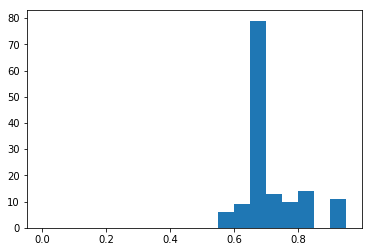

In [9]:
total = c['e'].values
plt.hist(total, bins = np.arange(0,1,step=.05))
plt.show()
#print(total.values)

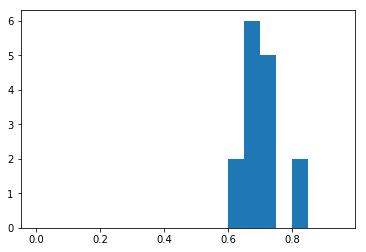

In [10]:
sample1 = np.random.choice(x, size=20, replace = False)
plt.hist(sample1, bins = np.arange(0,1,step=.05))
plt.show()

count    20.000000
mean      0.775372
std       0.130289
min       0.620930
25%       0.692433
50%       0.704146
75%       0.879900
max       0.982268
dtype: float64


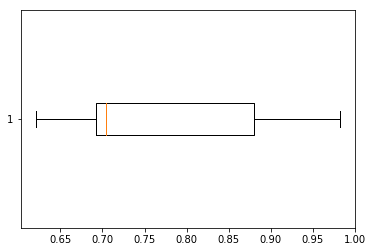

In [11]:
pd_samp = pd.Series(sample1)
print(pd_samp.describe())
plt.boxplot(sample1, vert= False)
plt.show()

count    160.000000
mean       0.748886
std        0.110730
min        0.586980
25%        0.685054
50%        0.694792
75%        0.815589
max        0.994268
dtype: float64


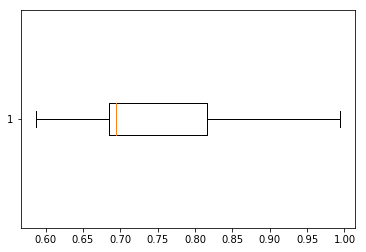

In [12]:
pd_total = pd.Series(total)
print(pd_total.describe())
plt.boxplot(total, vert= False)
plt.show()